1. # **DengAI**

**This code is based on previous works and it's still under construction**


## **Table of Contents:**
* Introduction
* Exploratory data analysis and Data Preprocessing
    - Converting Features
    - Creating new Features
* Building Machine Learning Models

## Introduction

We begin by importing all the necessary libraries and the dataset. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn import preprocessing
from statsmodels.tools import eval_measures
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import division

from matplotlib import  pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from statsmodels.base.model import GenericLikelihoodModel
from sklearn.svm import SVR
import time as time

from warnings import filterwarnings
filterwarnings('ignore')

X_train = pd.read_csv('dengue_features_train.csv')
X_test = pd.read_csv('dengue_features_test.csv')
y_train = pd.read_csv('dengue_labels_train.csv')


print(X_train.head(10))
print(X_train.describe())
print(X_train.info())

# Let's check the percentage of missing values in our dataset

total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train['city'].count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   
5   sj  1990          23      1990-06-04       NaN  0.174850  0.254314   
6   sj  1990          24      1990-06-11  0.112900  0.092800  0.205071   
7   sj  1990          25      1990-06-18  0.072500  0.072500  0.151471   
8   sj  1990          26      1990-06-25  0.102450  0.146175  0.125571   
9   sj  1990          27      1990-07-02       NaN  0.121550  0.160683   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.21142

,Total,Percent
ndvi_ne,194,0.133242
ndvi_nw,52,0.035714
station_diur_temp_rng_c,43,0.029533
station_avg_temp_c,43,0.029533
station_precip_mm,22,0.015110
ndvi_se,22,0.015110
ndvi_sw,22,0.015110
station_max_temp_c,20,0.013736
station_min_temp_c,14,0.009615
precipitation_amt_mm,13,0.008929


There are a few things to notice here. 

Firstly, from the description at first sight, from the description we cannot infer too much information. We have numbers that don't mean much to us right now. They seem well, but they may not be correct, so we will deal with them later on.

Secondly, good news. As we can see, there are not to many missing values. We will fill them with the mean later on aswell. Now we will check if there are outliers in our dataset.

San Juan:  936
Iquitos :  520


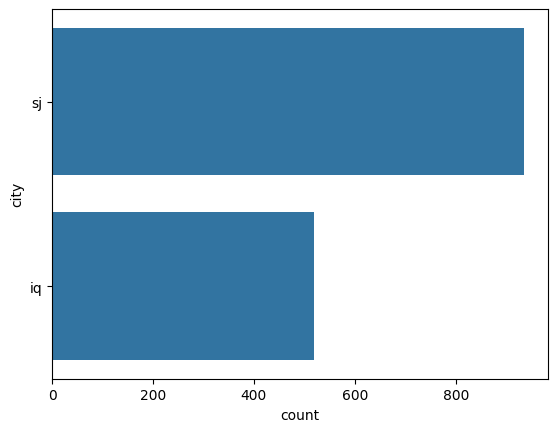

In [2]:
ax = sns.countplot(X_train['city'],label="Count")       # M = 212, B = 357
SanJuan, Iquitos = X_train['city'].value_counts()
print('San Juan: ', SanJuan)
print('Iquitos : ', Iquitos)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'ndvi_ne'),
  Text(2, 0, 'ndvi_nw'),
  Text(3, 0, 'ndvi_se'),
  Text(4, 0, 'ndvi_sw'),
  Text(5, 0, 'station_avg_temp_c'),
  Text(6, 0, 'station_diur_temp_rng_c'),
  Text(7, 0, 'station_max_temp_c'),
  Text(8, 0, 'station_min_temp_c'),
  Text(9, 0, 'station_precip_mm')])

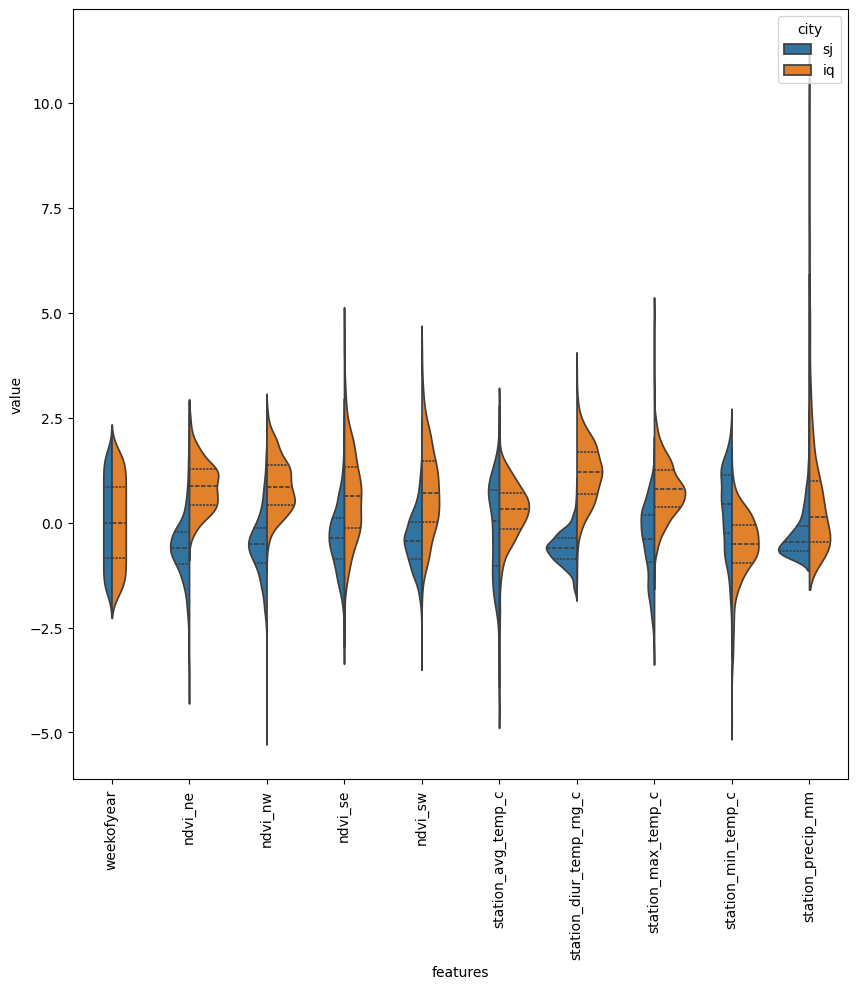

In [3]:
data_dia = X_train.copy()
y = X_train['city']
del data_dia['city']
del data_dia['year']
del data_dia['week_start_date']



del data_dia['reanalysis_sat_precip_amt_mm']
del data_dia['precipitation_amt_mm']
del data_dia['reanalysis_avg_temp_k']
del data_dia['reanalysis_air_temp_k']
del data_dia['reanalysis_dew_point_temp_k']
del data_dia['reanalysis_max_air_temp_k']
del data_dia['reanalysis_min_air_temp_k']
del data_dia['reanalysis_precip_amt_kg_per_m2']
del data_dia['reanalysis_relative_humidity_percent']
del data_dia['reanalysis_specific_humidity_g_per_kg']
del data_dia['reanalysis_tdtr_k']

data_n_2 = (data_dia - data_dia.mean()) / (data_dia.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data['value'], downcast='float')
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="features", y="value", hue="city", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

There's something strange going on there, right? We see that, after normalizing, the feature "station_precip_mm" alters the scale of our graph. Let's print the description of that feature.

In [4]:
print(X_train['station_precip_mm'].describe())

count    1434.000000
mean       39.326360
std        47.455314
min         0.000000
25%         8.700000
50%        23.850000
75%        53.900000
max       543.300000
Name: station_precip_mm, dtype: float64


**BOOM**. There you have it. It has an extremely large variance. Looking at its mean, it has an average of around 40mm, while the maximum is 543 (after normalizing). Let's drop it for a moment, just to have a clearer view of the plots.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'ndvi_ne'),
  Text(2, 0, 'ndvi_nw'),
  Text(3, 0, 'ndvi_se'),
  Text(4, 0, 'ndvi_sw'),
  Text(5, 0, 'station_avg_temp_c'),
  Text(6, 0, 'station_diur_temp_rng_c'),
  Text(7, 0, 'station_max_temp_c'),
  Text(8, 0, 'station_min_temp_c')])

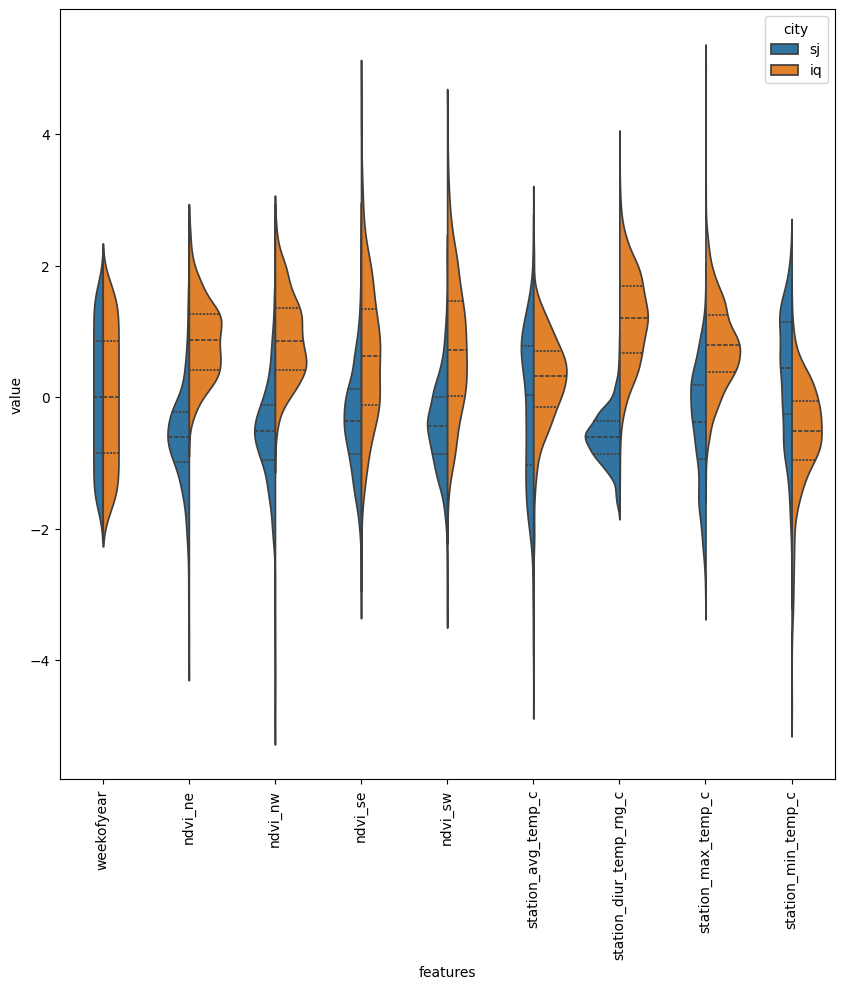

In [5]:
data_dia2 = X_train.copy()
del data_dia2['city']
del data_dia2['year']
del data_dia2['week_start_date']


del data_dia2['station_precip_mm']
del data_dia2['reanalysis_sat_precip_amt_mm']
del data_dia2['precipitation_amt_mm']
del data_dia2['reanalysis_avg_temp_k']
del data_dia2['reanalysis_air_temp_k']
del data_dia2['reanalysis_dew_point_temp_k']
del data_dia2['reanalysis_max_air_temp_k']
del data_dia2['reanalysis_min_air_temp_k']
del data_dia2['reanalysis_precip_amt_kg_per_m2']
del data_dia2['reanalysis_relative_humidity_percent']
del data_dia2['reanalysis_specific_humidity_g_per_kg']
del data_dia2['reanalysis_tdtr_k']

data_n_22 = (data_dia2 - data_dia2.mean()) / (data_dia2.std())              # standardization

data2 = pd.concat([y,data_n_22],axis=1)

data2 = pd.melt(data2,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data2['value'], downcast='float')
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="features", y="value", hue="city", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'precipitation_amt_mm'),
  Text(2, 0, 'reanalysis_air_temp_k'),
  Text(3, 0, 'reanalysis_avg_temp_k'),
  Text(4, 0, 'reanalysis_dew_point_temp_k'),
  Text(5, 0, 'reanalysis_max_air_temp_k'),
  Text(6, 0, 'reanalysis_min_air_temp_k'),
  Text(7, 0, 'reanalysis_precip_amt_kg_per_m2'),
  Text(8, 0, 'reanalysis_relative_humidity_percent'),
  Text(9, 0, 'reanalysis_sat_precip_amt_mm'),
  Text(10, 0, 'reanalysis_specific_humidity_g_per_kg'),
  Text(11, 0, 'reanalysis_tdtr_k')])

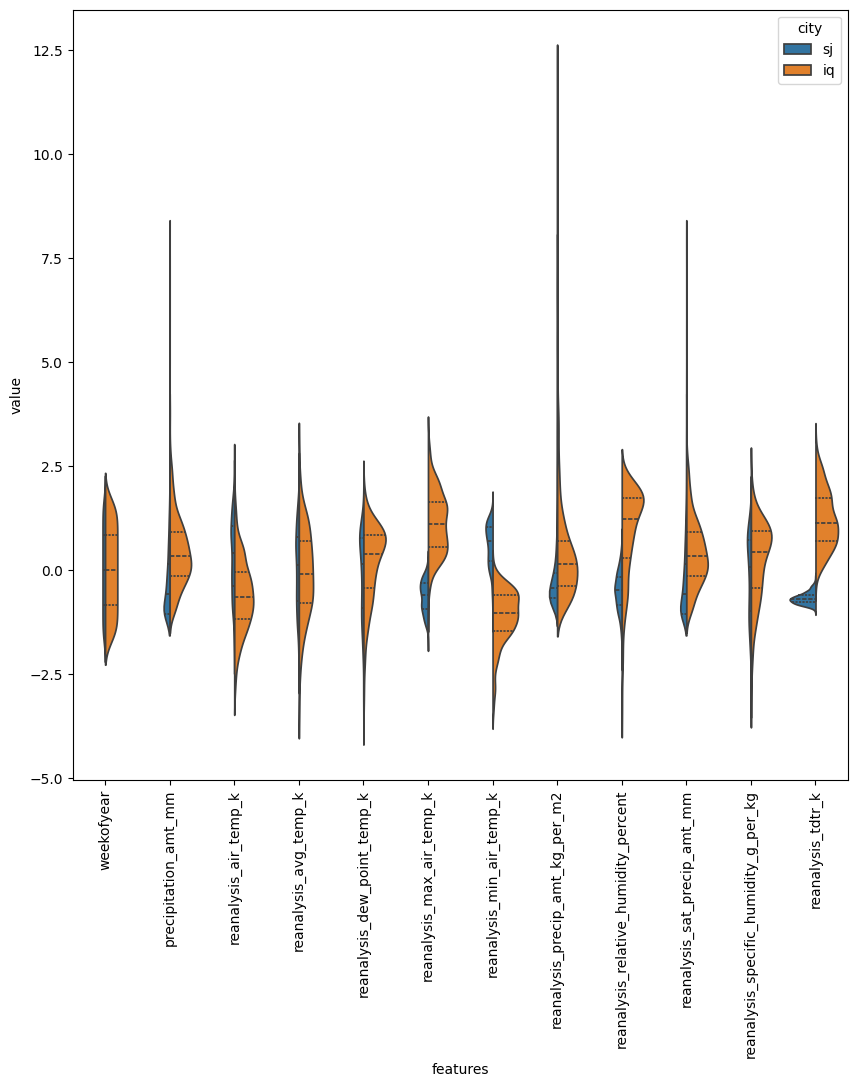

In [6]:
data_dia2 = X_train.copy()
del data_dia2['city']
del data_dia2['year']
del data_dia2['week_start_date']
del data_dia2['ndvi_ne']
del data_dia2['ndvi_nw']
del data_dia2['station_diur_temp_rng_c']
del data_dia2['station_avg_temp_c']
del data_dia2['station_precip_mm']
del data_dia2['ndvi_se']
del data_dia2['ndvi_sw']
del data_dia2['station_max_temp_c']
del data_dia2['station_min_temp_c']


data_n_22 = (data_dia2 - data_dia2.mean()) / (data_dia2.std())              # standardization

data2 = pd.concat([y,data_n_22],axis=1)

data2 = pd.melt(data2,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data2['value'], downcast='float')
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="features", y="value", hue="city", data=data2,split=True, inner="quart")
plt.xticks(rotation=90)


Again, we see that there are different features which have extreme values. Exploring the dataset, it seems that they are not outleirs nor errors, so we cannot drop them, and we will have to take them into account. Those values are about precipitation, and since they are rain values, it is reasonable to assume that depending on the areas weather can change drastically. 


But what else can we extract from these plots? For example, in **ndvi_ne** feature, median of the *San Juan* and *Iquitos* looks like separated so it can be good for classification. However, in **reanalysis_avg_temp_k** feature,  median of the *San Juan* and *Iquitos* does not looks like separated so it does not gives good information for classification. This happens with many other features.

Also, note that the features **reanalysis_avg_temp_k** and **reanalysis_specific_humidity_g_per_kg** have a very similar shape,  but how can we decide whether they are correlated with each other or not? Correlation is the answer.

Non-numeric columns: Index(['city', 'week_start_date'], dtype='object')


<Axes: >

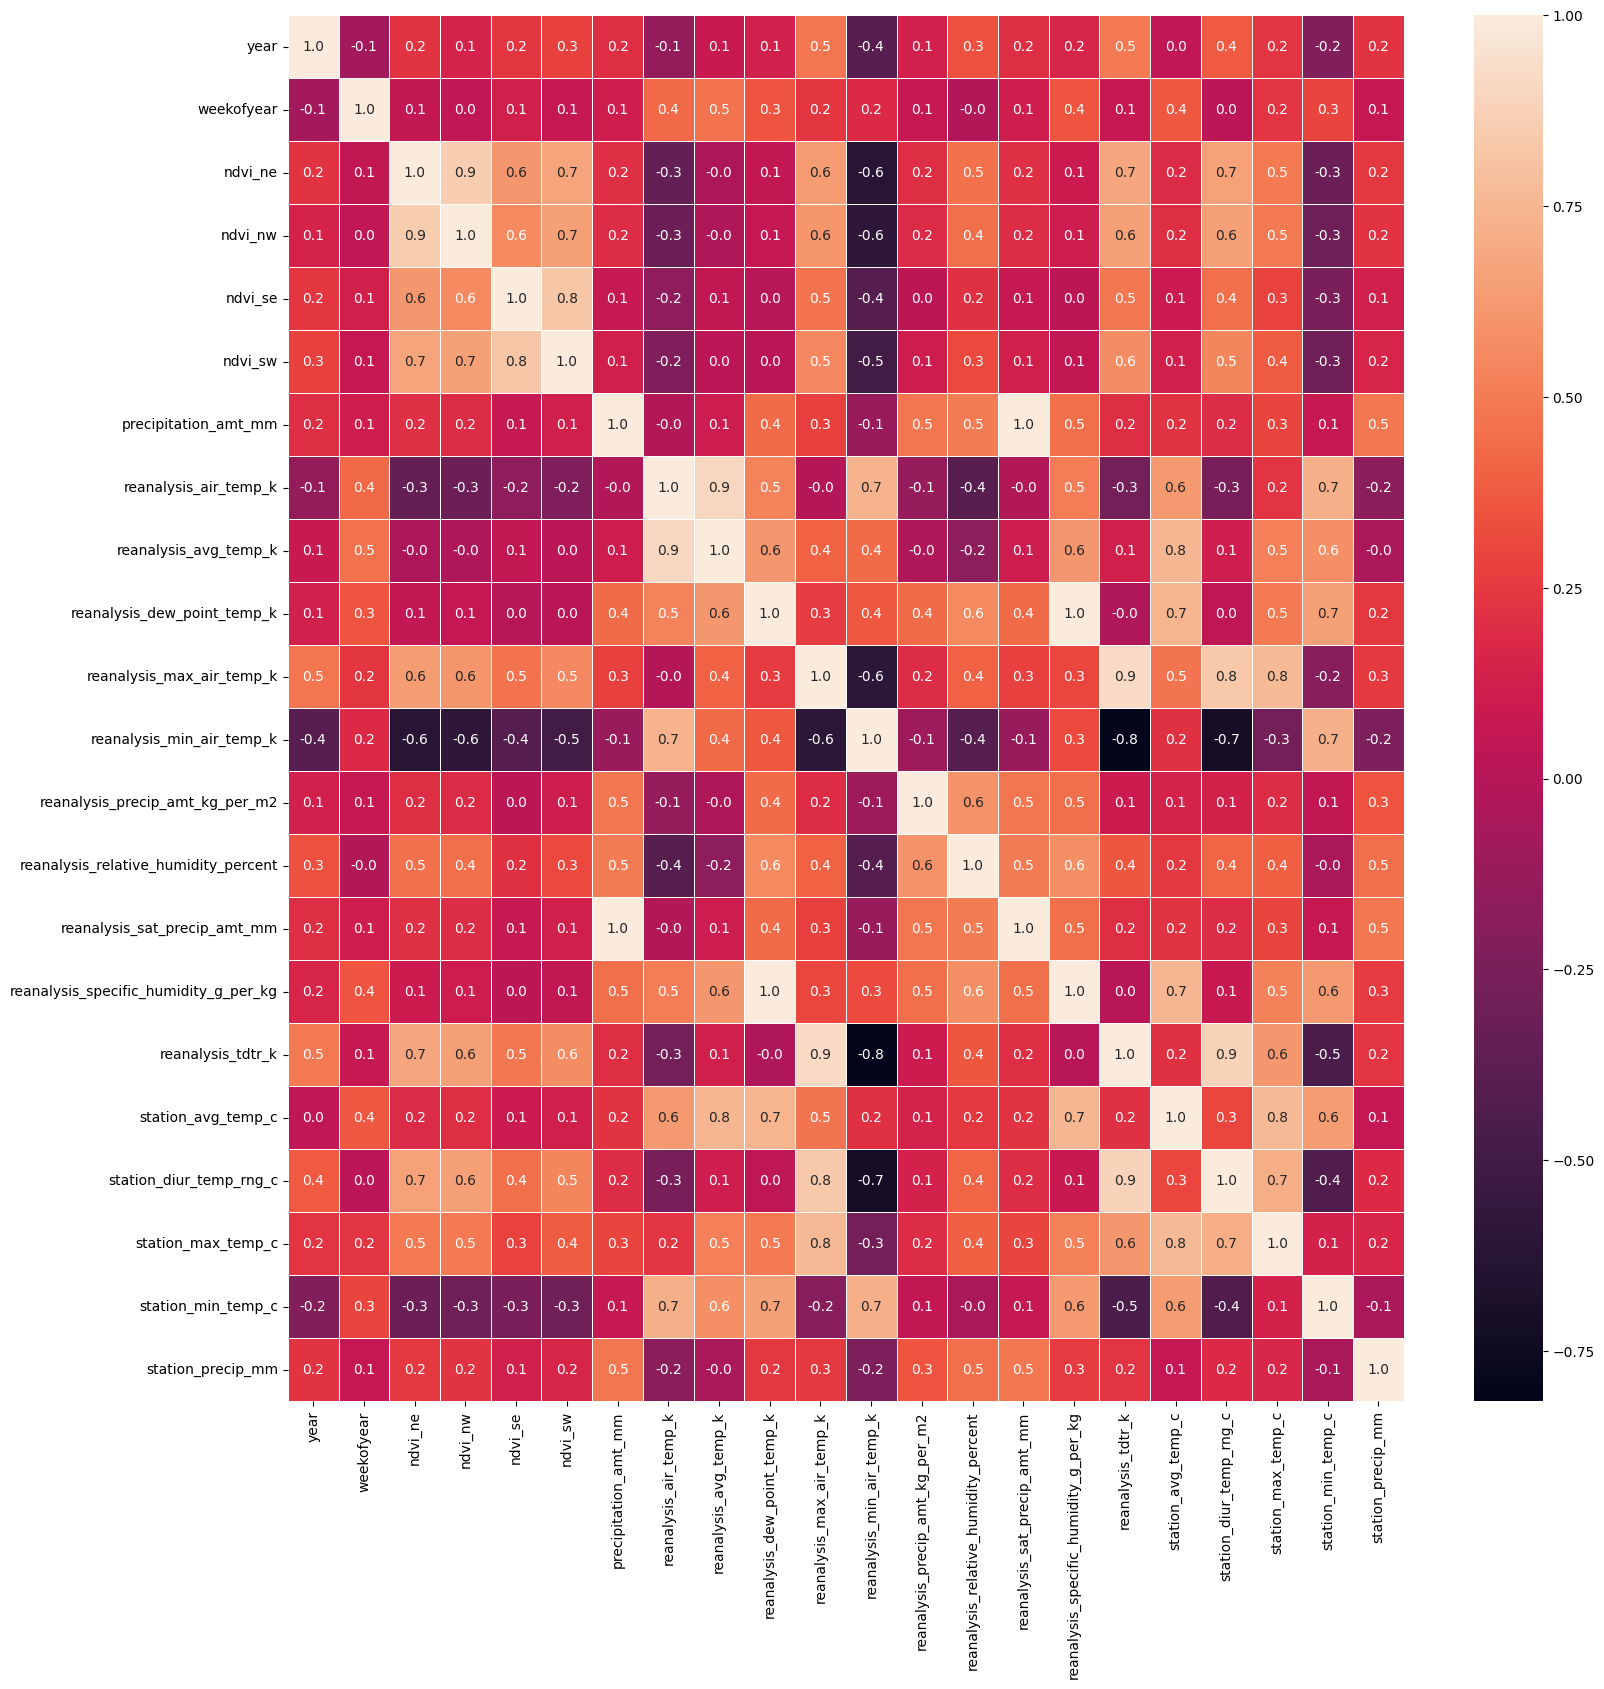

In [7]:
# Check for non-numeric columns
non_numeric_columns = X_train.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns or convert them to numeric (if possible)
# For example, you can drop non-numeric columns
X_train_numeric = X_train.drop(columns=non_numeric_columns)

# Create heatmap of the correlation matrix with only numeric columns
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_train_numeric.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

#empt = ['ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_precip_amt_kg_per_m2','reanalysis_relative_humidity_percent','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','station_avg_temp_c','station_diur_temp_rng_c','station_max_temp_c','station_min_temp_c','station_precip_mm']
#

Checking this last graph, we see that some features have perfect correlation (value 1) and nearly perfect correlation (0.9). These are:

**reanalysis_sat_precip_amt_mm** and** precipitation_amt_mm **  with perfect correlation.
**reanalysis_specific_humidity_g_per_kg** and** reanalysis_dew_point_temp_k ** with perfect correlation.
**ndvi_nw** and **ndvi_ne** having correltion value 0.9.
**reanalysis_avg_temp_k **and **reanalysis_air_temp_k ** having correltion value 0.9.
**reanalysis_tdtr_k ** and **reanalysis_max_air_temp_k** having correltion value 0.9.
**station_diur_temp_rng_c ** and **reanalysis_tdtr_k** having correltion value 0.9.


Before making some actions, we will explore a little bit more our dataset.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'ndvi_ne'),
  Text(2, 0, 'ndvi_nw'),
  Text(3, 0, 'ndvi_se'),
  Text(4, 0, 'ndvi_sw'),
  Text(5, 0, 'station_avg_temp_c'),
  Text(6, 0, 'station_diur_temp_rng_c'),
  Text(7, 0, 'station_max_temp_c'),
  Text(8, 0, 'station_min_temp_c')])

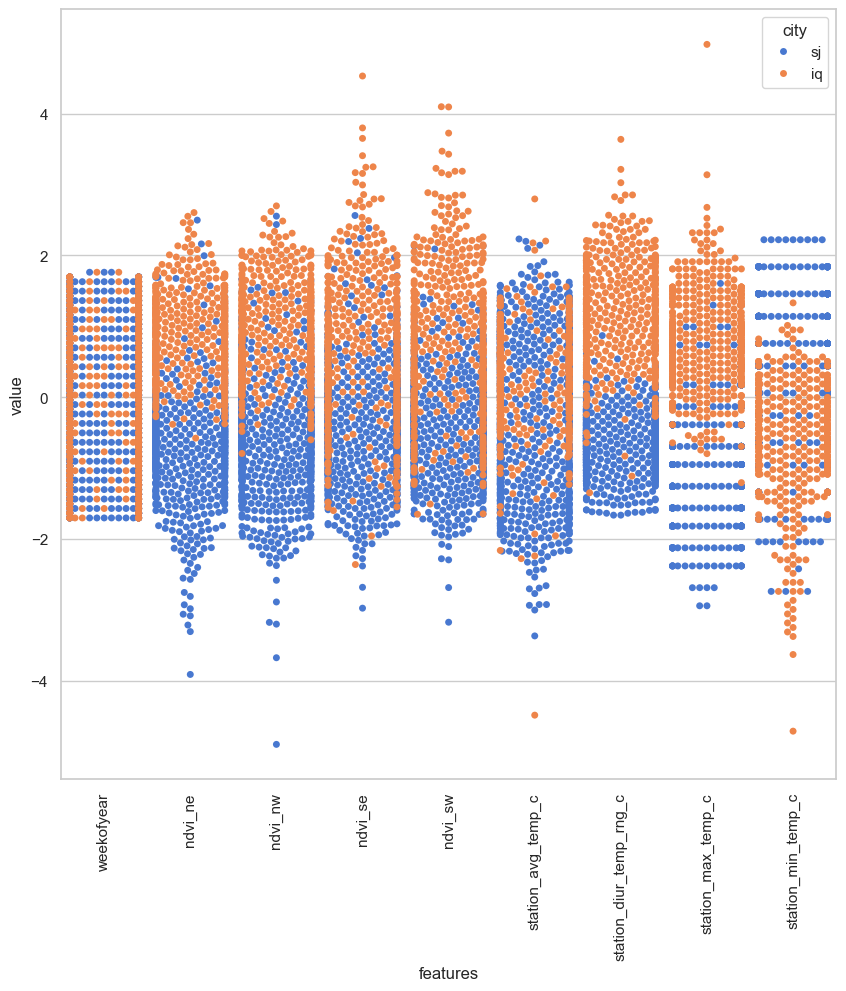

In [8]:
sns.set(style="whitegrid", palette="muted")
data_dia2 = X_train.copy()
del data_dia2['city']
del data_dia2['year']
del data_dia2['week_start_date']


del data_dia2['station_precip_mm']
del data_dia2['reanalysis_sat_precip_amt_mm']
del data_dia2['precipitation_amt_mm']
del data_dia2['reanalysis_avg_temp_k']
del data_dia2['reanalysis_air_temp_k']
del data_dia2['reanalysis_dew_point_temp_k']
del data_dia2['reanalysis_max_air_temp_k']
del data_dia2['reanalysis_min_air_temp_k']
del data_dia2['reanalysis_precip_amt_kg_per_m2']
del data_dia2['reanalysis_relative_humidity_percent']
del data_dia2['reanalysis_specific_humidity_g_per_kg']
del data_dia2['reanalysis_tdtr_k']

data_n_22 = (data_dia2 - data_dia2.mean()) / (data_dia2.std())              # standardization

data2 = pd.concat([y,data_n_22],axis=1)

data2 = pd.melt(data2,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data2['value'], downcast='float')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="city", data=data2)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'weekofyear'),
  Text(1, 0, 'precipitation_amt_mm'),
  Text(2, 0, 'reanalysis_air_temp_k'),
  Text(3, 0, 'reanalysis_avg_temp_k'),
  Text(4, 0, 'reanalysis_dew_point_temp_k'),
  Text(5, 0, 'reanalysis_max_air_temp_k'),
  Text(6, 0, 'reanalysis_min_air_temp_k'),
  Text(7, 0, 'reanalysis_precip_amt_kg_per_m2'),
  Text(8, 0, 'reanalysis_relative_humidity_percent'),
  Text(9, 0, 'reanalysis_sat_precip_amt_mm'),
  Text(10, 0, 'reanalysis_specific_humidity_g_per_kg'),
  Text(11, 0, 'reanalysis_tdtr_k')])

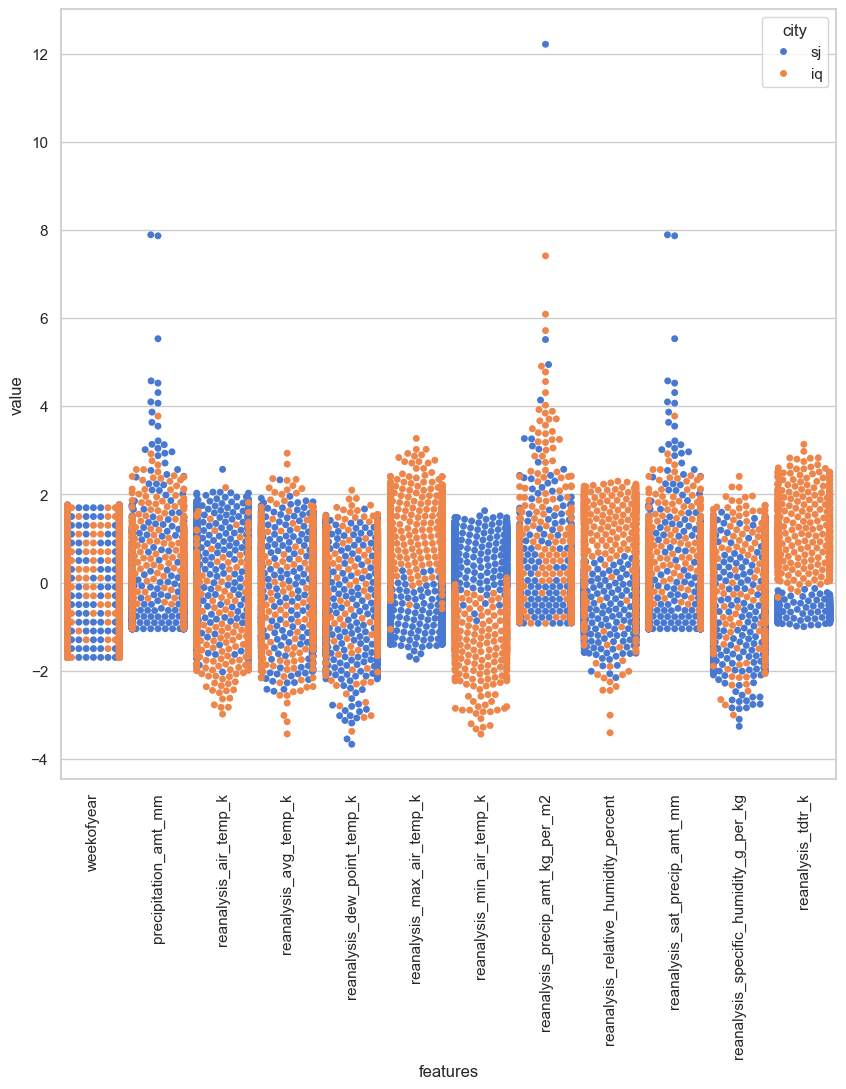

In [9]:
sns.set(style="whitegrid", palette="muted")
data_dia2 = X_train.copy()
del data_dia2['city']
del data_dia2['year']
del data_dia2['week_start_date']
del data_dia2['ndvi_ne']
del data_dia2['ndvi_nw']
del data_dia2['station_diur_temp_rng_c']
del data_dia2['station_avg_temp_c']
del data_dia2['station_precip_mm']
del data_dia2['ndvi_se']
del data_dia2['ndvi_sw']
del data_dia2['station_max_temp_c']
del data_dia2['station_min_temp_c']


data_n_22 = (data_dia2 - data_dia2.mean()) / (data_dia2.std())              # standardization

data2 = pd.concat([y,data_n_22],axis=1)

data2 = pd.melt(data2,id_vars="city",
                    var_name="features",
                    value_name='value')
pd.to_numeric(data2['value'], downcast='float')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="city", data=data2)
plt.xticks(rotation=90)

What information does this give us? Well, we can see that there are some features in which the two cities are very separated, and this will be good for classification (the most clear example being **reanalysis_tdtr_k**. On the other hand, there are features in which the information is very mixed, and those will not be that good for classification.


But there's much more we can do with this dataset! For example, we can create a new dataframe which will be X_train plus the total_cases column of y_train, so that we can cretre new and interesting plots.

TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000013858E3EB50>.

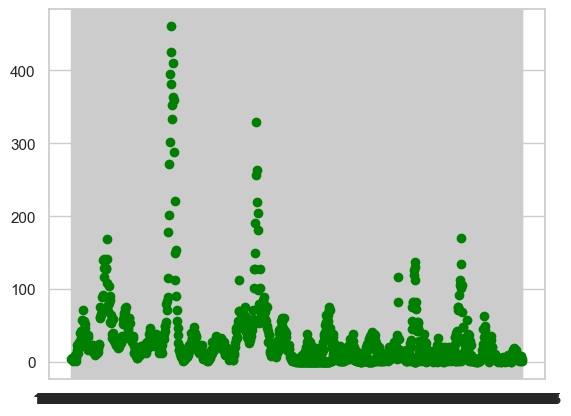

In [10]:


new_xtrain = X_train.copy()
new_xtrain['total_cases'] = y_train['total_cases']

plt.plot_date(new_xtrain['week_start_date'], new_xtrain['total_cases'], color='green', label='sj')
plt.plot_date(new_xtrain['week_start_date'], new_xtrain['total_cases'], color='blue', label='iq')
plt.xlabel('Year')
plt.ylabel('Total cases')
plt.legend(loc='upper right')
plt.show()

# Feature Selection

Ok then, so we are now ready for selecting the features we will use for classification. For the moment, I will drop the following features: **reanalysis_sat_precip_amt_mm**, **reanalysis_specific_humidity_g_per_kg **. I won't do the same with the ones that have correlation value of 0.9 at this time.


In [11]:
delete = ['week_start_date','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg']
for z in delete:
    del X_train[z]
    del X_test[z]

If we tried to do machine learning up to this point, we would notice that the accuracy is really small. This is because the total cases vary a lot, from 0 to 400+. So what can we do to improve that? 

The first thing we'll try is to divide our dataset in two, one for San Juan and another one for Iquitos. Since we've modified our dataframes, we'll import them again and play with them.

In [12]:
X_trainc = pd.read_csv('dengue_features_train.csv')
X_testc = pd.read_csv('dengue_features_test.csv')
y_trainc = pd.read_csv('dengue_labels_train.csv')


X_train_sj = X_trainc.loc[X_train.city=='sj']
y_train_sj = y_trainc.loc[y_train.city=='sj']

X_train_iq = X_trainc.loc[X_train.city=='iq']
y_train_iq = y_trainc.loc[y_train.city=='iq']

print('features: ', X_train_sj.shape)
print('labels  : ', y_train_sj.shape)

print('\nIquitos')
print('features: ', X_train_iq.shape)
print('labels  : ', y_train_iq.shape)


features:  (936, 24)
labels  :  (936, 4)

Iquitos
features:  (520, 24)
labels  :  (520, 4)


Text(0.5, 0, 'Time')

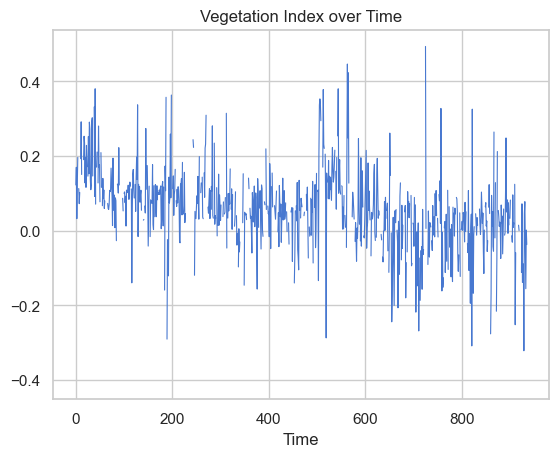

In [13]:
(X_train_sj.ndvi_ne.plot.line(lw=0.8))
plt.title('Vegetation Index over Time')
plt.xlabel('Time')

Our target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. Standard regression techniques for this type of prediction include:

1. Poisson regression
2. Negative binomial regression

Which technique will perform better depends on many things, but the choice between Poisson regression and negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that the mean and variance of the population distribution are equal. When they aren't, specifically when the variance is much larger than the mean, the negative binomial approach is better. Why? It isn't magic. The negative binomial regression simply lifts the assumption that the population mean and variance are equal, allowing for a larger class of possible models. In fact, from this perspective, the Poisson distribution is but a special case of the negative binomial distribution.

In [15]:
print('San Juan')
print('mean: ', y_train_sj['total_cases'].mean())
print('var :', y_train_sj['total_cases'].var())

print('\nIquitos')
print('mean: ', y_train_iq['total_cases'].mean())
print('var :', y_train_iq['total_cases'].var())

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


variance >> mean suggests total_cases can be described by a negative binomial distribution, so we'll use a negative binomial regression below. We will now check the correlations to see if there is any difference between the cities. To gain more insight, we will add the colum of total cases to see if there is any correlation with other variables.

Non-numeric columns: Index(['city', 'week_start_date'], dtype='object')


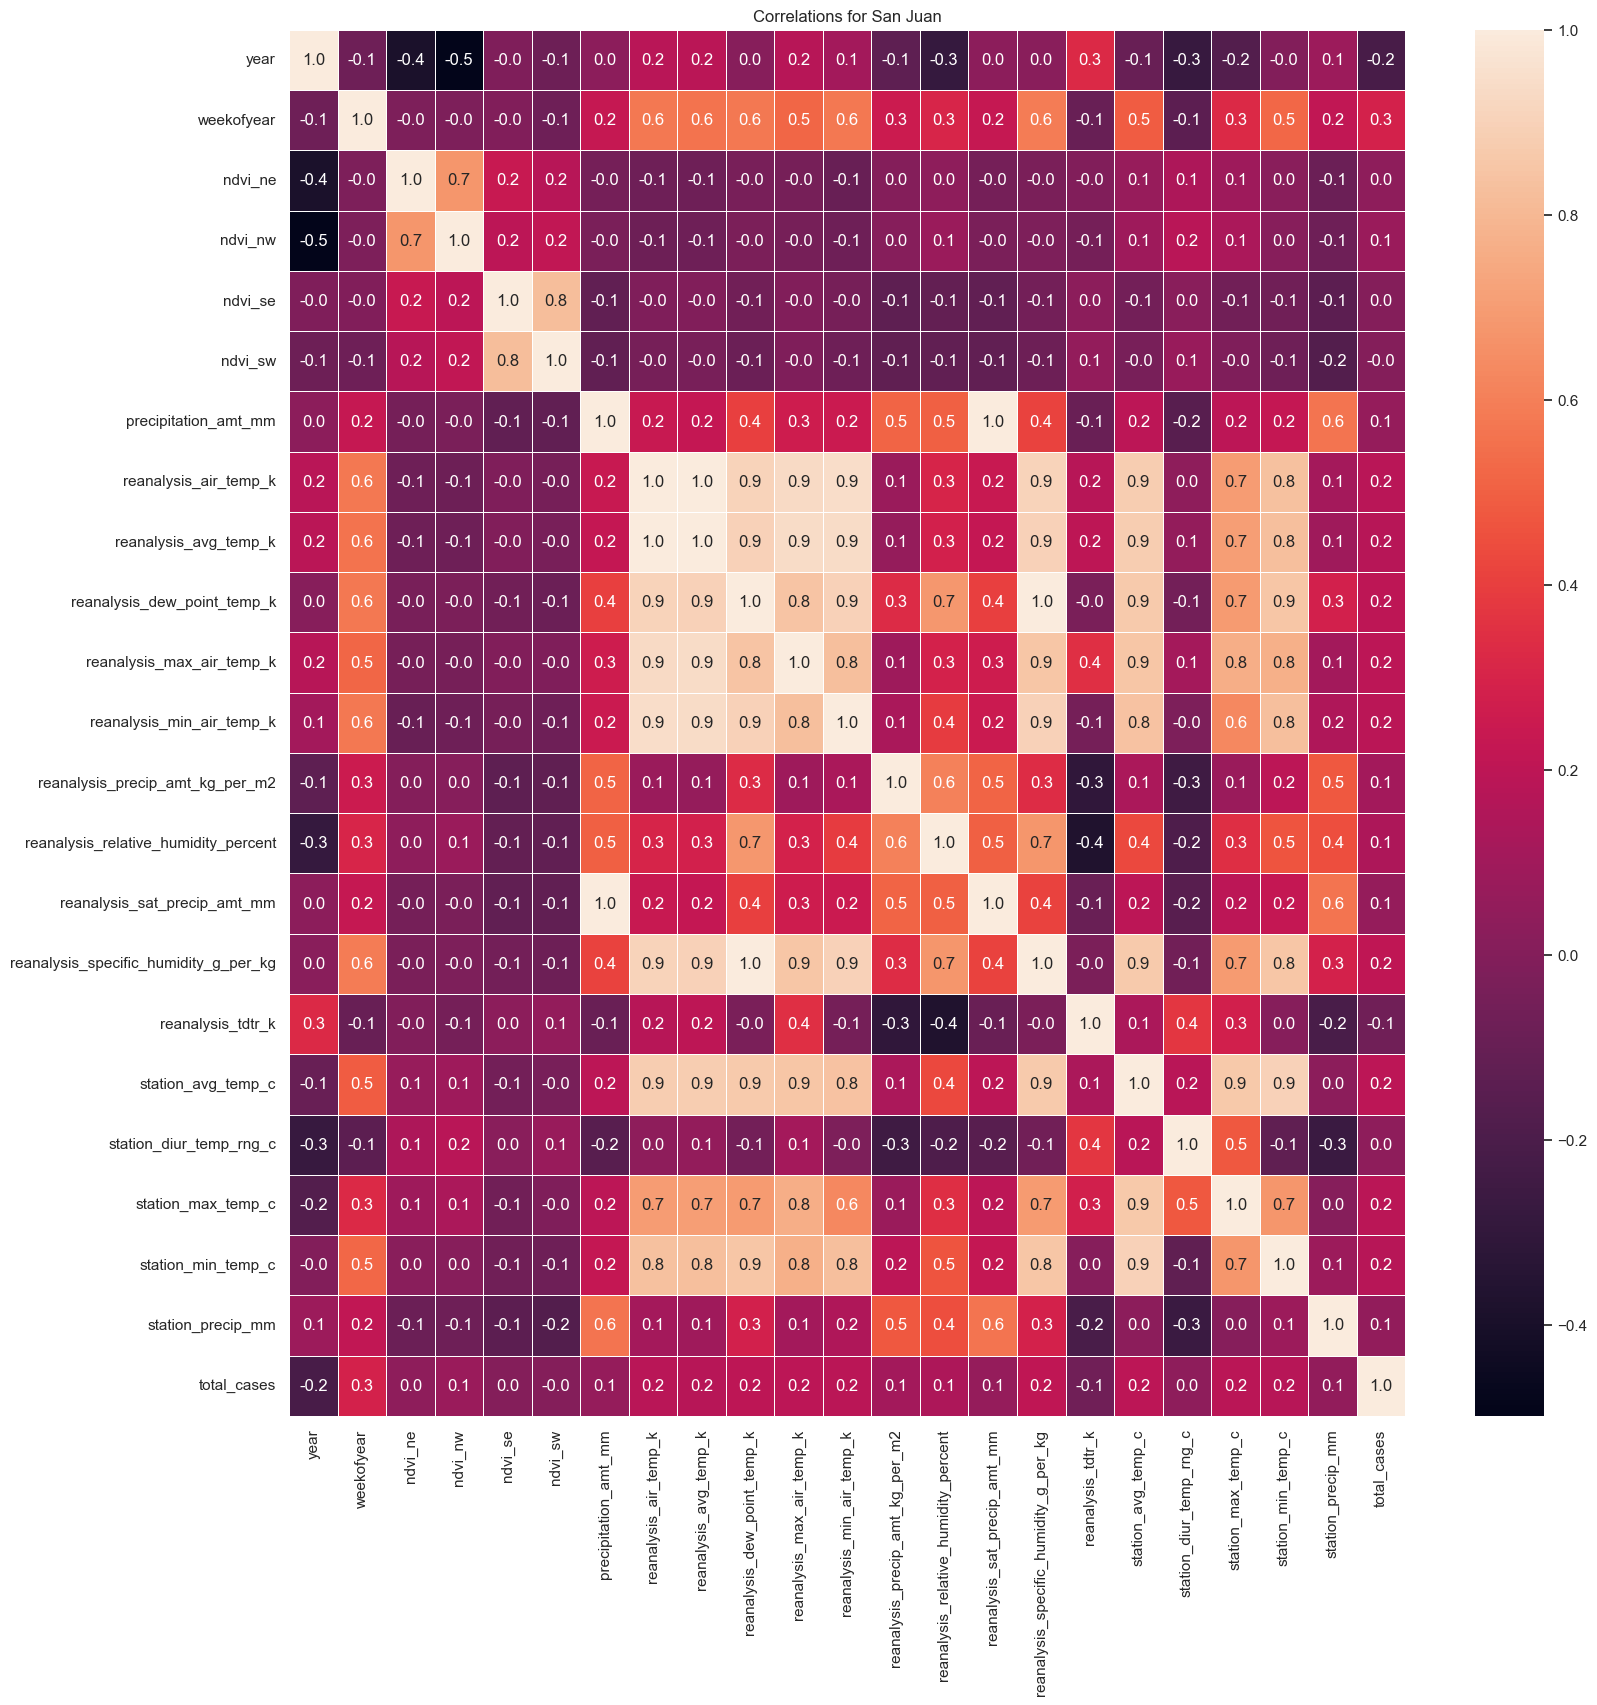

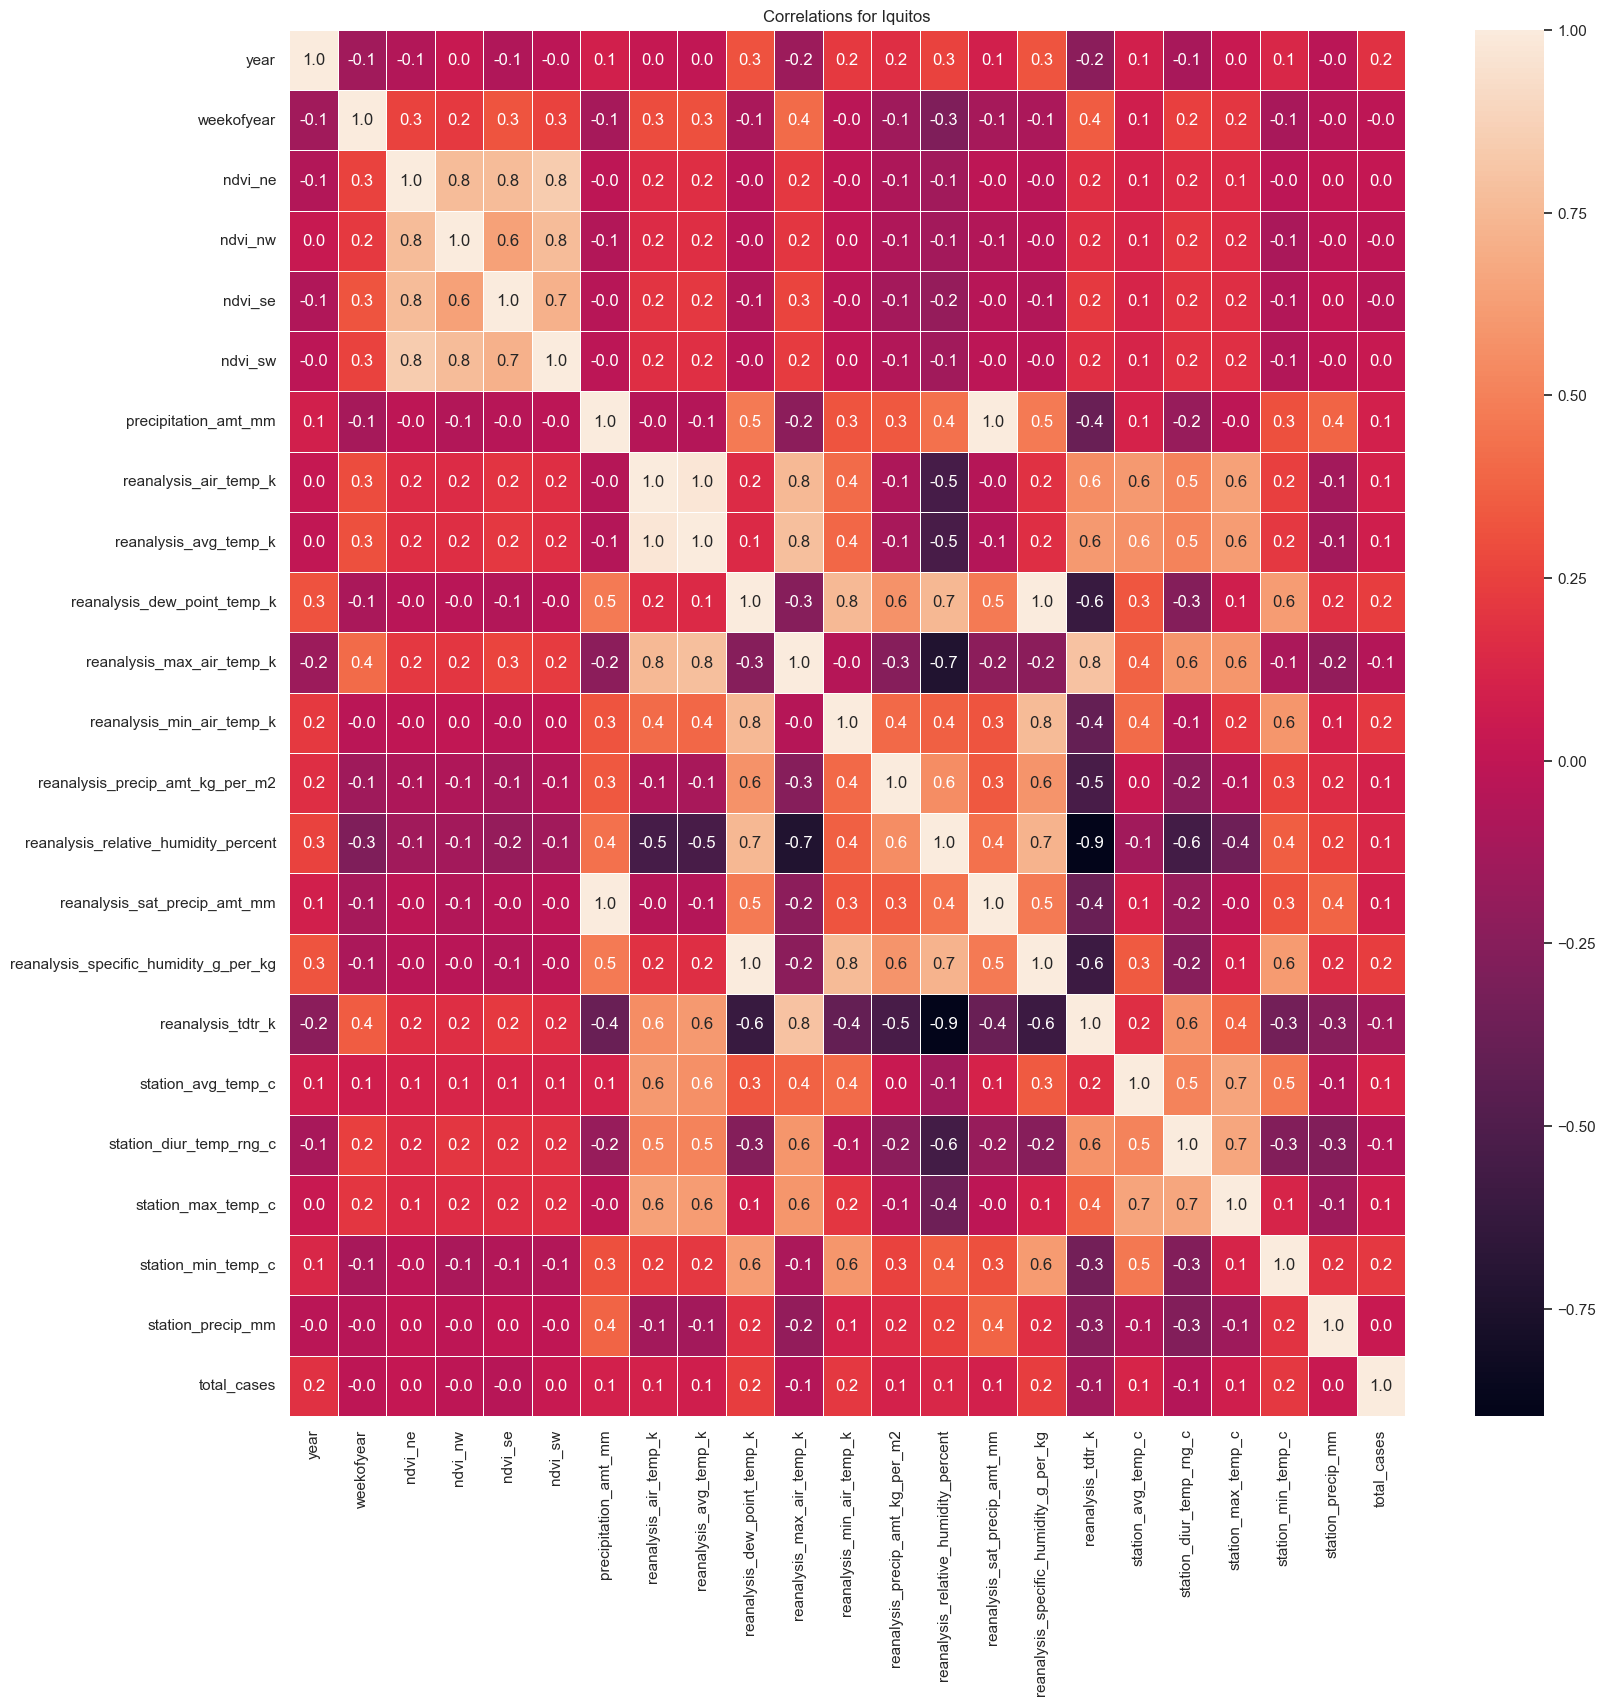

In [16]:
X_train_sj['total_cases'] = y_train_sj['total_cases']
X_train_iq['total_cases'] = y_train_iq['total_cases']

# Check for non-numeric columns
non_numeric_columns = X_train_sj.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns or convert them to numeric (if possible)
# For example, you can drop non-numeric columns
X_train_sj_nn = X_train_sj.drop(columns=non_numeric_columns)
X_train_iq_nn = X_train_iq.drop(columns=non_numeric_columns)

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_train_sj_nn.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for San Juan')
plt.show()

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X_train_iq_nn.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Correlations for Iquitos')
plt.show()

Text(0.5, 1.0, 'Correlations for San Juan')

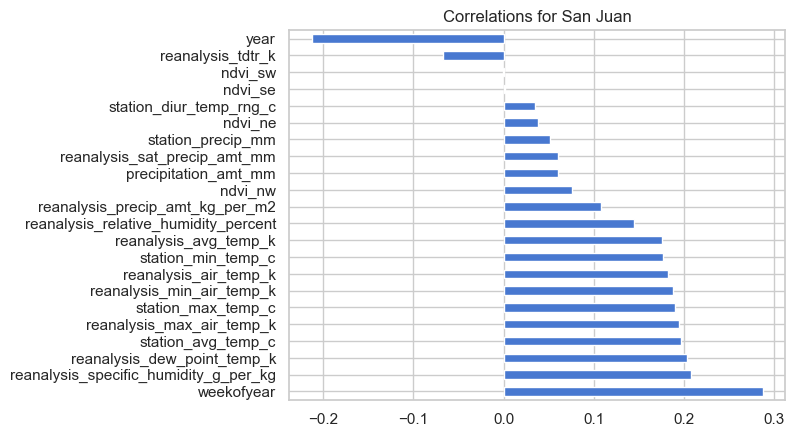

In [17]:
sj_correlations = X_train_sj_nn.corr()
iq_correlations = X_train_iq_nn.corr()
(sj_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for San Juan')

Text(0.5, 1.0, 'Correlations for Iquitos')

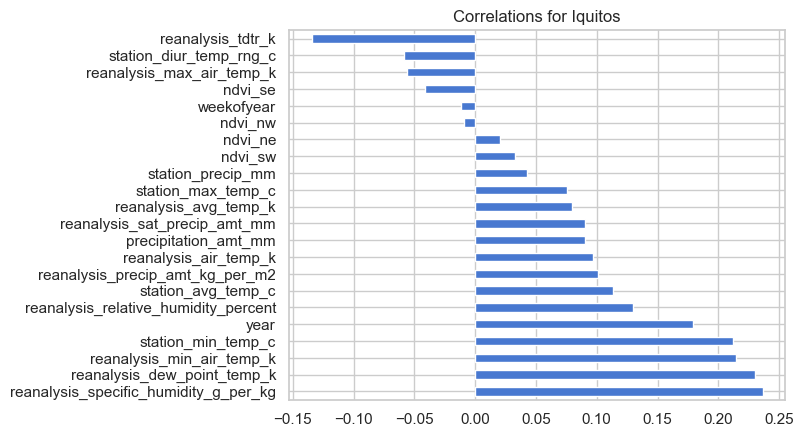

In [18]:
(iq_correlations['total_cases'].drop('total_cases').sort_values(ascending=False).plot.barh())
plt.title('Correlations for Iquitos')

So we have some valuable information here. For both cities,**reanalysis_specific_humidity_g_per_kg**, **reanalysis_dew_point_temp_k** and  **reanalysis_min_air_temp_k** are the ones that are most strongly correlated with the total cases. Does this make sense? Of course, we know that mosquitoes tend to live in places with high humidity. Also, temperature is highly related with the spread of mosquitoes, so it makes sense it is related with the total cases. Surprisingly, in the city of San Juan, the week of year is highly correlated as well, so we'll keep an eye on that. 

If we plot the amount of cases as a function of the week of year, we see that there are outbreaks in both Iquitos and San Juan toward the ends of each year. The increases in cases and outbreaks tend to happen in weeks 35 to 45 in San Juan and weeks 45 to 50 in Iquitos.

Text(0, 0.5, 'Number of Cases')

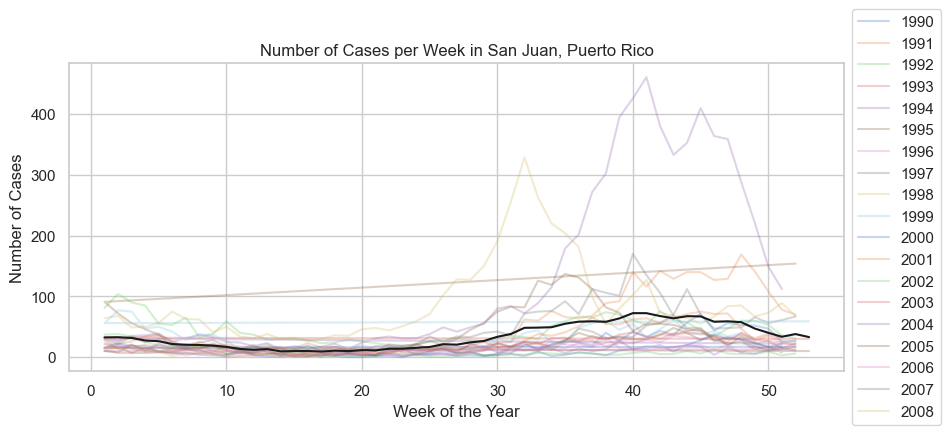

In [19]:
for i in set(y_train_sj['year']):
    df = y_train_sj[y_train_sj['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)
    
y_train_sj.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(y_train_sj['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in San Juan, Puerto Rico')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

Text(0, 0.5, 'Number of Cases')

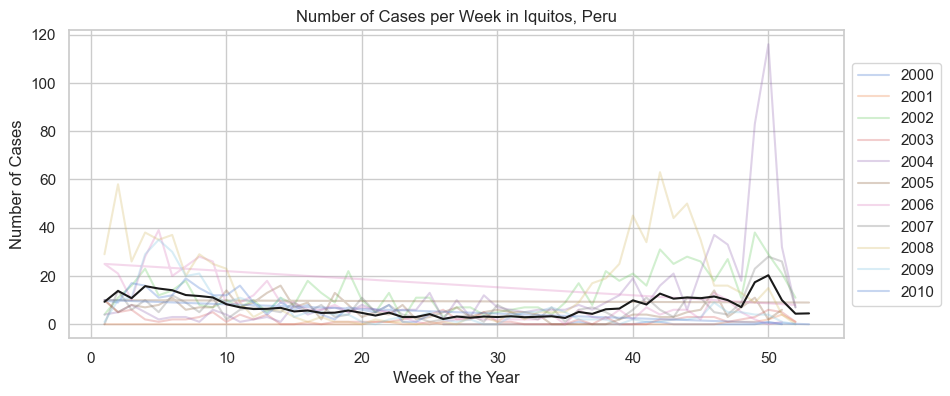

In [20]:
for i in set(y_train_iq['year']):
    df = y_train_iq[y_train_iq['year'] == i]
    df.set_index('weekofyear', drop = True, inplace = True)
    plt.plot(df['total_cases'], alpha = .3)

y_train_iq.groupby('weekofyear')['total_cases'].mean().plot(c = 'k', figsize = (10,4))
plt.legend(set(y_train_iq['year']), loc='center left', bbox_to_anchor=(1, .5))

plt.title('Number of Cases per Week in Iquitos, Peru')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Cases')

# Building Machine Learning models

Now that we have a more clearer understanding of our dataset, we will proceed to build our ML models.

First of all, we will also do the same as we did before, splitting now the test data into San Juan and Iquitos, and do the same pre-processing for both.

In [21]:
X_test_sj = X_testc.loc[X_testc.city=='sj']
X_test_iq = X_testc.loc[X_testc.city=='iq']


X_train_sj=X_train_sj.join(X_train_sj.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
X_test_sj=X_test_sj.join(X_train_sj.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
X_train_iq=X_train_iq.join(X_train_iq.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')
X_test_iq=X_test_iq.join(X_train_iq.groupby(['city','weekofyear'])['total_cases'].mean(), on=['city','weekofyear'], rsuffix='_avg')

features2=['total_cases','total_cases', 'reanalysis_specific_humidity_g_per_kg','station_avg_temp_c','reanalysis_dew_point_temp_k','station_min_temp_c','station_max_temp_c','reanalysis_min_air_temp_k','reanalysis_max_air_temp_k','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k','reanalysis_min_air_temp_k','station_min_temp_c']      

#TRAIN
X_sj= X_train_sj[features2]
Y_sj = X_train_sj['total_cases']

X_iq= X_train_iq[features2]
Y_iq = X_train_iq['total_cases']

#TEST
X_sj_t= X_test_sj[features2]
X_iq_t= X_test_iq[features2]

X_sj.fillna(method='bfill', inplace=True)
X_iq.fillna(method='bfill', inplace=True)

X_sj_t.fillna(method='bfill', inplace=True)
X_iq_t.fillna(method='bfill', inplace=True)


In [22]:
##SAN JUAN
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X_sj,Y_sj)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)
model_sj=svr.best_estimator_
print(model_sj)

SVR complexity and bandwidth selected and model fitted in 24.171 s
SVR(C=1000.0, gamma=0.01)


In [23]:
##IQUITOS
train_size = 100
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

t0 = time.time()
svr.fit(X_iq,Y_iq)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)
model_iq=svr.best_estimator_
print(model_iq)

SVR complexity and bandwidth selected and model fitted in 3.526 s
SVR(C=1000.0, gamma=0.01)


In [24]:
#KNN 
k_range = list(range(1, 50))
knnsj = KNeighborsClassifier(n_neighbors = 30)
knnsj.fit(X_sj,Y_sj)


knniq = KNeighborsClassifier(n_neighbors = 30)
knniq.fit(X_iq,Y_iq)


# ----------------
# LogisticRegression
# ----------------
logregsj = LogisticRegression()
logregsj.fit(X_sj, Y_sj)

logregiq = LogisticRegression()
logregiq.fit(X_iq, Y_iq)

LogisticRegression()

In [25]:
map_city = {'sj':0, 'iq':1}

datasets = [X_train_sj, X_train_iq, y_train_sj ,y_train_iq,X_test_sj, X_test_iq ]

for df in datasets:
    df['city'] = df['city'].map(map_city)

#sj_train_subtrain = X_train_sj.head(700)
#sj_train_subtest = X_train_sj.tail(X_train_sj.shape[0] - 700)
sj_train_subtrain = X_train_sj.sample(frac=0.7)
sj_train_subtest = X_train_sj.loc[~X_train_sj.index.isin(sj_train_subtrain.index)]


#iq_train_subtrain = X_train_iq.head(350)
#iq_train_subtest = X_train_iq.tail(X_train_iq.shape[0] - 350)
iq_train_subtrain = X_train_iq.sample(frac=0.7)
iq_train_subtest = X_train_iq.loc[~X_train_iq.index.isin(iq_train_subtrain.index)]



iq_train_subtrain.fillna(method='bfill', inplace=True)
iq_train_subtest.fillna(method='bfill', inplace=True)
sj_train_subtrain.fillna(method='bfill', inplace=True)
sj_train_subtest.fillna(method='bfill', inplace=True)


In [ ]:
#create preds
preds_sj= model_sj.predict(sj_train_subtest[features2]).astype(int)
preds_iq=model_iq.predict(iq_train_subtest[features2]).astype(int)
#add to the dataframes
sj_train_subtest['fitted'] = preds_sj
iq_train_subtest['fitted'] = preds_iq
### reset axis
sj_train_subtest.index = sj_train_subtest['week_start_date']
iq_train_subtest.index = iq_train_subtest['week_start_date']
## make plot


# KNN
preds_sj2 = knnsj.predict(sj_train_subtest[features2]).astype(int)
preds_iq2 = knniq.predict(iq_train_subtest[features2]).astype(int)

sj_train_subtest['fitted2'] = preds_sj2
iq_train_subtest['fitted2'] = preds_iq2

sj_train_subtest.index = sj_train_subtest['week_start_date']
iq_train_subtest.index = iq_train_subtest['week_start_date']

# Logistic regression

preds_sj3 = logregsj.predict(sj_train_subtest[features2]).astype(int)
preds_iq3 = logregiq.predict(iq_train_subtest[features2]).astype(int)

sj_train_subtest['fitted3'] = preds_sj3
iq_train_subtest['fitted3'] = preds_iq3

sj_train_subtest.index = sj_train_subtest['week_start_date']
iq_train_subtest.index = iq_train_subtest['week_start_date']


"""
plt.figure(figsize=(15,10))
sj_train_subtest.total_cases.plot(label="Actual")
sj_train_subtest.fitted.plot( label="Predictions")
plt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")
plt.legend()

"""

'\nplt.figure(figsize=(15,10))\nsj_train_subtest.total_cases.plot(label="Actual")\nsj_train_subtest.fitted.plot( label="Predictions")\nplt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")\nplt.legend()\n\n'

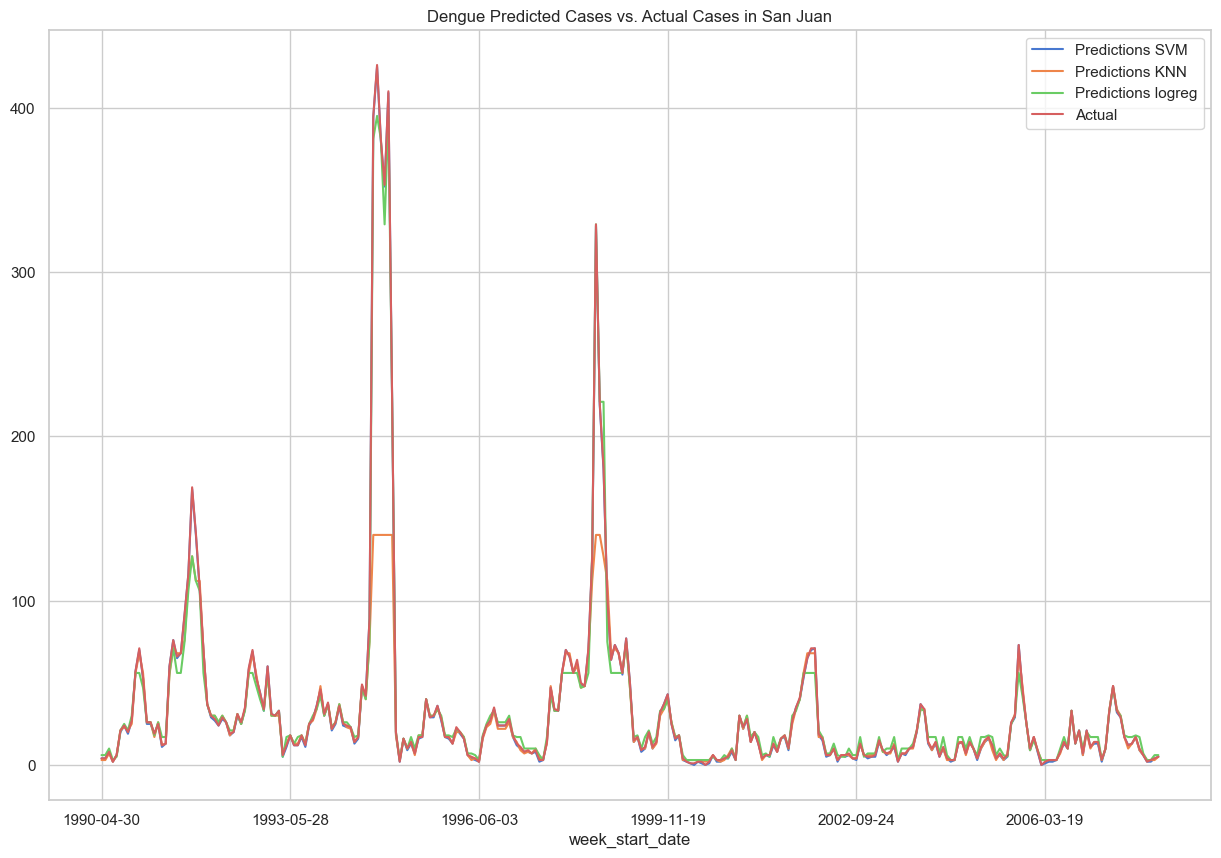

In [ ]:

## make plot
plt.figure(figsize=(15,10))
sj_train_subtest.fitted.plot( label="Predictions SVM")
sj_train_subtest.fitted2.plot( label="Predictions KNN")
sj_train_subtest.fitted3.plot( label="Predictions logreg")
sj_train_subtest.total_cases.plot(label="Actual")
plt.title("Dengue Predicted Cases vs. Actual Cases in San Juan")
plt.legend()


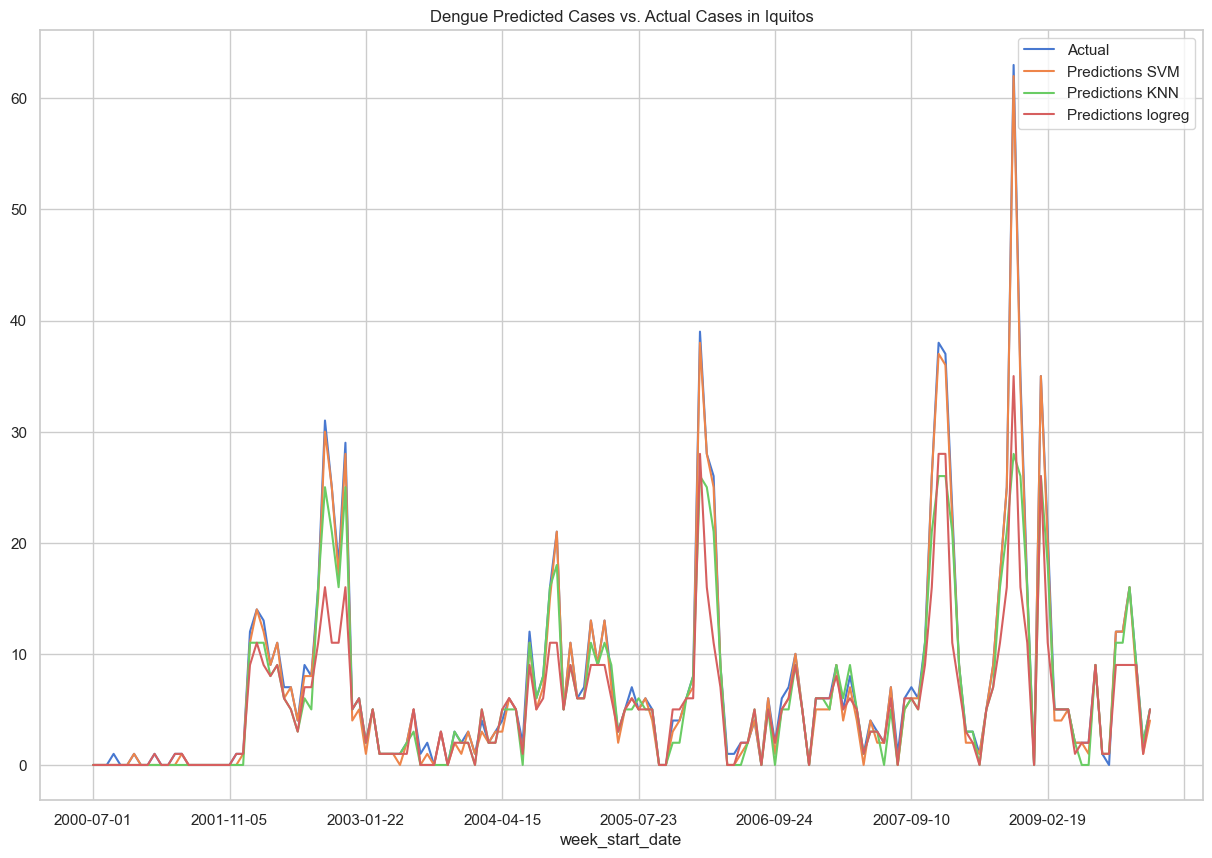

In [ ]:
plt.figure(figsize=(15,10))
iq_train_subtest.total_cases.plot(label="Actual")
iq_train_subtest.fitted.plot(label="Predictions SVM")
iq_train_subtest.fitted2.plot( label="Predictions KNN")
iq_train_subtest.fitted3.plot( label="Predictions logreg")
plt.title("Dengue Predicted Cases vs. Actual Cases in Iquitos")
plt.legend()

In [ ]:

scores = cross_val_score(knnsj, X_sj,Y_sj, cv=5, scoring = "accuracy")
print("Scores for San Juan using SVM:", scores)
print("Mean for San Juan using SVM:", scores.mean())

scores2 = cross_val_score(knniq, X_iq,Y_iq, cv=5, scoring = "accuracy")
print("Scores for Iquitos using SVM:", scores2)
print("Mean for Iquitos using SVM:", scores2.mean())

Scores for San Juan using SVM: [0.28723404 0.26737968 0.28342246 0.29946524 0.31550802]
Mean for San Juan using SVM: 0.29060188872454207
Scores for Iquitos using SVM: [0.38461538 0.36538462 0.38461538 0.30769231 0.38461538]
Mean for Iquitos using SVM: 0.36538461538461536


In [ ]:
knnsj.fit(X_sj,Y_sj)
knniq.fit(X_iq,Y_iq)

sj_predictions = knnsj.predict(X_sj_t).astype(int)
iq_predictions = knniq.predict(X_iq_t).astype(int)

print(sj_predictions)

submission = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission.total_cases = np.concatenate([sj_predictions, iq_predictions])

submission.to_csv("knn.csv")

[10 10 10 10 13 14 16 16 21 21 23 25 33 36 48 48 48 56 55 55 55 68 68 68
 68 68 68 68 56 56 56 47 37 31 37 30 30 30 26 26 22 20 20 17 17 13 11 14
  9  9 11  8 11 10 10 11 13 13 14 18 21 21 25 25 33 36 48 48 48 55 55 55
 55 68 68 68 68 68 68 68 56 55 56 48 40 34 37 34 30 31 30 26 26 22 19 19
 18 17 14 13 13  8 10 10 10 10 10 10 10 14 14 14 16 21 21 25 25 34 36 48
 48 48 56 55 55 55 68 68 68 68 68 68 68 56 56 56 47 38 31 37 31 31 30 26
 26 22 22 20 17 17 13 13 14 10 10 10  8 10 10 11 10 13 13 14 18 21 21 25
 25 33 36 48 48 48 56 55 55 56 68 68 68 68 68 68 68 56 56 56 47 38 31 37
 30 31 30 26 26 20 22 20 17 17 14 11 14 10 10 10  7 10 10 10 10 13 14 14
 18 21 21 25 25 33 36 48 48 48 56 55 55 55 61 68 68 68 68 68 68 56 56 56
 48 38 31 30 30 30 26 26 20 20 20 17 17 15 13 13 10 10 10  8]


In [ ]:


model_sj.fit(X_sj,Y_sj)
model_iq.fit(X_iq,Y_iq)

sj_predictions2 = model_sj.predict(X_sj_t).astype(int)
iq_predictions2 = model_iq.predict(X_iq_t).astype(int)

print(sj_predictions2)

submission2 = pd.read_csv("submission_format.csv",
                         index_col=[0, 1, 2])

submission2.total_cases = np.concatenate([sj_predictions2, iq_predictions2])

submission2.to_csv("svm.csv")

[10 10 11 12 13 14 15 17 21 20 24 27 33 37 47 49 49 56 57 59 57 64 72 72
 68 63 67 68 60 59 58 46 39 33 37 34 34 31 27 26 21 20 20 18 16 13 12 12
  8 10 10  9 10 10 11 11 13 14 15 16 21 22 24 26 33 38 50 49 50 58 57 60
 56 63 74 75 69 63 67 67 59 58 56 47 40 33 38 32 32 32 32 27 27 21 20 20
 18 18 14 12 13 10 10 10  9 11  9 11 10 13 13 15 17 21 21 24 26 34 38 49
 48 50 58 58 60 57 65 72 72 67 64 67 67 59 60 58 47 40 34 38 33 33 32 27
 26 21 20 20 19 16 13 11 13  9 10 10  9 10 10 12 11 13 13 17 18 22 20 24
 27 34 38 48 48 49 56 58 59 58 64 73 72 67 63 68 67 58 60 57 48 40 34 38
 33 33 32 26 26 21 20 20 19 16 13 12 13  9 10 10  9 10  9 11 11 13 14 15
 19 23 20 24 26 33 37 47 48 51 54 60 60 60 65 73 73 68 63 68 67 57 60 58
 46 40 33 32 33 31 27 25 21 20 20 19 16 13 13 13 10 10 10  9]
